# Final Project - Data Analysis

- INFO 5871-001
- Keke Wu
- Fall 2019

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.special import expit
# Avoids certain warning messages later
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.formula.api as sm
import statsmodels.api as sma
from statsmodels.graphics.gofplots import qqplot

### Import Datasets

Make dataframes for both csv files and drop the duplicates in demographics by user_id.

Groupby "model_type".


In [2]:
cc_df = pd.read_csv('cc.csv')
cc_df.head()

,user_id,vis_type,model_type,color_ramp_index,target_value,selected_value,aesthetic_rating,trial_number,age,occupation,gender,normal_vision,cdv,hours_per_day_on_computer,education,display_type,display_size_inches,design_experience,comments
0,2,heatmap,designer,1,6,6,0,1,30,Service Designer,Male,yes,no,6,graduateStudies,phone,4,8,NaN
1,2,scatter,designer,8,5,3,-20,2,30,Service Designer,Male,yes,no,6,graduateStudies,phone,4,8,NaN
2,2,choropleth,linear,21,8,8,27,3,30,Service Designer,Male,yes,no,6,graduateStudies,phone,4,8,NaN
3,2,choropleth,designer,11,6,6,24,4,30,Service Designer,Male,yes,no,6,graduateStudies,phone,4,8,NaN
4,2,scatter,bayesian,24,4,3,37,5,30,Service Designer,Male,yes,no,6,graduateStudies,phone,4,8,NaN


In [3]:
grouped = cc_df.groupby('model_type')
bayesian = grouped.get_group('bayesian')
kmeans = grouped.get_group('kmeans')
designer = grouped.get_group('designer')
linear = grouped.get_group('linear')

## Accuracy & Aesthetics

### Calculate the Accuracy for Each Model

In [4]:
bayesian_diff = bayesian['selected_value'] - bayesian['target_value']
bayesian_diff.value_counts('0')

 0    0.526455
 1    0.246032
-1    0.174603
-2    0.015873
 2    0.013228
 3    0.007937
-3    0.002646
 7    0.002646
 6    0.002646
 5    0.002646
 4    0.002646
-4    0.002646
dtype: float64

In [5]:
kmeans_diff = kmeans['selected_value'] - kmeans['target_value']
kmeans_diff.value_counts('0')

 0    0.531746
 1    0.201058
-1    0.187831
-2    0.026455
 2    0.021164
 3    0.018519
 6    0.005291
-4    0.002646
-6    0.002646
-5    0.002646
dtype: float64

In [6]:
designer_diff = designer['selected_value'] - designer['target_value']
designer_diff.value_counts('0')

 0    0.486772
 1    0.222222
-1    0.193122
 2    0.039683
-2    0.018519
 4    0.010582
 3    0.007937
-3    0.005291
 7    0.005291
 5    0.005291
-6    0.002646
-4    0.002646
dtype: float64

In [7]:
linear_diff = linear['selected_value'] - linear['target_value']
linear_diff.value_counts('0')

 0    0.439153
 1    0.238095
-1    0.203704
 2    0.042328
-2    0.039683
-3    0.021164
 5    0.005291
 7    0.002646
-6    0.002646
 4    0.002646
 3    0.002646
dtype: float64

#### Conclusion: The acurracy for each model is as follows:
_Bayesian: 52.64%
Kmeans: 53.17%
Designer: 48.68%
Linear: 43.92%_

### Calculate the Average Aesthetic Rating for Each Model

In [8]:
bayesian_aes = bayesian['aesthetic_rating'].mean()
bayesian['aesthetic_rating'].describe()

count    378.000000
mean       6.314815
std       43.410982
min     -100.000000
25%      -15.000000
50%        0.000000
75%       30.000000
max      100.000000
Name: aesthetic_rating, dtype: float64

In [9]:
kmeans_aes = kmeans['aesthetic_rating'].mean()
kmeans['aesthetic_rating'].describe()

count    378.000000
mean      12.066138
std       45.039309
min     -100.000000
25%        0.000000
50%        0.000000
75%       37.500000
max      100.000000
Name: aesthetic_rating, dtype: float64

In [10]:
designer_aes = designer['aesthetic_rating'].mean()
designer['aesthetic_rating'].describe()

count    378.000000
mean       6.605820
std       48.854091
min     -100.000000
25%      -15.000000
50%        0.000000
75%       32.000000
max      100.000000
Name: aesthetic_rating, dtype: float64

In [11]:
linear_aes = linear['aesthetic_rating'].mean()
linear['aesthetic_rating'].describe()

count    378.000000
mean      -0.452381
std       49.444223
min     -100.000000
25%      -31.750000
50%        0.000000
75%       27.750000
max      100.000000
Name: aesthetic_rating, dtype: float64

#### Conclusion: The average aesthetic rating for each model is as follows:
_Bayesian: 6.31
Kmeans: 12.07
Designer: 6.61
Linear: -0.45_

### Visualization

In [12]:
model = ['Bayesian', 'Kmeans', 'Designer', 'Linear']
model_accuracy = [52.64, 53.17, 48.68, 43.92]
model_aesthetics = [6.31, 12.07, 6.61, -0.45]

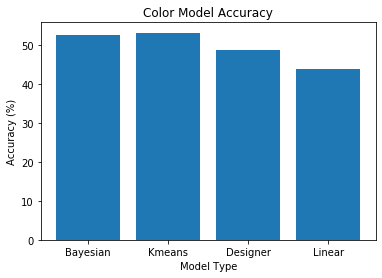

In [13]:
# Make a bar chart for accuracy:
y_pos = np.arange(len(model_accuracy))
 
# Create bars
plt.bar(y_pos, model_accuracy)
 
# Create names on the x-axis
plt.xticks(y_pos, model)

# Add title and axis names
plt.title('Color Model Accuracy')
plt.xlabel('Model Type')
plt.ylabel('Accuracy (%)')

# Show graphic
plt.show()

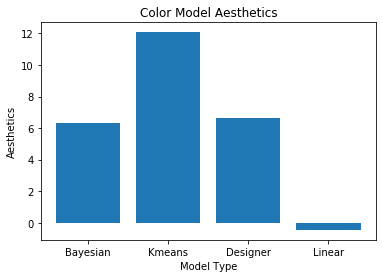

In [14]:
# Make a bar chart for aesthetics:
y_pos = np.arange(len(model_aesthetics))
 
# Create bars
plt.bar(y_pos, model_aesthetics)
 
# Create names on the x-axis
plt.xticks(y_pos, model)

# Add title and axis names
plt.title('Color Model Aesthetics')
plt.xlabel('Model Type')
plt.ylabel('Aesthetics')

# Show graphic
plt.show()

## Multiple Regression for Aesthetics

In [15]:
cc_df.head()

,user_id,vis_type,model_type,color_ramp_index,target_value,selected_value,aesthetic_rating,trial_number,age,occupation,gender,normal_vision,cdv,hours_per_day_on_computer,education,display_type,display_size_inches,design_experience,comments
0,2,heatmap,designer,1,6,6,0,1,30,Service Designer,Male,yes,no,6,graduateStudies,phone,4,8,NaN
1,2,scatter,designer,8,5,3,-20,2,30,Service Designer,Male,yes,no,6,graduateStudies,phone,4,8,NaN
2,2,choropleth,linear,21,8,8,27,3,30,Service Designer,Male,yes,no,6,graduateStudies,phone,4,8,NaN
3,2,choropleth,designer,11,6,6,24,4,30,Service Designer,Male,yes,no,6,graduateStudies,phone,4,8,NaN
4,2,scatter,bayesian,24,4,3,37,5,30,Service Designer,Male,yes,no,6,graduateStudies,phone,4,8,NaN


In [16]:
model1 = sm.ols(formula ="aesthetic_rating ~ vis_type + model_type  + age + gender + hours_per_day_on_computer + education + display_type + display_size_inches + design_experience", data=cc_df)
reg1 = model1.fit()
print(reg1.aic)
reg1.summary()

15751.286798904113


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       aesthetic_rating   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     13.94
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           1.26e-35
Time:                        12:59:01   Log-Likelihood:                -7858.6
No. Observations:                1512   AIC:                         1.575e+04
Df Residuals:                    1495   BIC:                         1.584e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       39.1181      7.807      5.011      0.000      23.804      54.432
vis_type[T.heatmap]             -9.3750      2.772     -3.382      0.001     -14.812      -3.938
vis_type[T.scatter]             -0.5040      2.772     -0.182      0.856      -5.941       4.933
model_type[T.designer]           0.2910      3.201      0.091      0.928      -5.987       6.569
model_type[T.kmeans]             5.7513      3.201      1.797      0.073      -0.527      12.030
model_type[T.linear]            -6.7672      3.201     -2.114      0.035     -13.045      -0.489
gender[T.Male]                  -9.6956      2.725     -3.558      0.000     -15.042      -4.350
gender[T.noReply]              -39.0517      9.773     -3.996      0.000     -58.223     -19.881
education[T.graduateStudies]    -6.8822      3.498     -1.968      0.049     -13.743      -0.021
education[T.highSchool]         -1.7698      6.025     -0.294      0.769     -13.588      10.048
education[T.someCollege]       -12.8232      3.993     -3.211      0.001     -20.656      -4.990
display_type[T.laptop]         -17.4184      2.609     -6.677      0.000     -22.536     -12.301
display_type[T.phone]            4.0739      5.346      0.762      0.446      -6.413      14.561
age                              0.2758      0.178      1.551      0.121      -0.073       0.625
hours_per_day_on_computer       -2.5647      0.498     -5.155      0.000      -3.541      -1.589
display_size_inches              0.0105      0.171      0.062      0.951      -0.325       0.346
design_experience               -0.0336      0.259     -0.130      0.897      -0.541       0.474
==============================================================================
Omnibus:                        0.318   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.273
Skew:                          -0.031   Prob(JB):                        0.872
Kurtosis:                       3.023   Cond. No.                         365.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
reg1.pvalues.idxmax()

'display_size_inches'

#### 1. Drop 'display_size_inches'

In [18]:
model2 = sm.ols(formula ="aesthetic_rating ~ vis_type + model_type  + age + gender + hours_per_day_on_computer + education + display_type + design_experience", data=cc_df)
reg2 = model2.fit()
print(reg2.aic)
reg2.summary()

15749.29062964777


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       aesthetic_rating   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     14.88
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           3.20e-36
Time:                        12:59:01   Log-Likelihood:                -7858.6
No. Observations:                1512   AIC:                         1.575e+04
Df Residuals:                    1496   BIC:                         1.583e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       39.2230      7.616      5.150      0.000      24.283      54.163
vis_type[T.heatmap]             -9.3750      2.771     -3.383      0.001     -14.810      -3.940
vis_type[T.scatter]             -0.5040      2.771     -0.182      0.856      -5.939       4.931
model_type[T.designer]           0.2910      3.200      0.091      0.928      -5.985       6.567
model_type[T.kmeans]             5.7513      3.200      1.798      0.072      -0.525      12.027
model_type[T.linear]            -6.7672      3.200     -2.115      0.035     -13.043      -0.491
gender[T.Male]                  -9.6737      2.701     -3.581      0.000     -14.972      -4.375
gender[T.noReply]              -39.1243      9.699     -4.034      0.000     -58.149     -20.100
education[T.graduateStudies]    -6.8296      3.391     -2.014      0.044     -13.480      -0.179
education[T.highSchool]         -1.7190      5.966     -0.288      0.773     -13.422       9.984
education[T.someCollege]       -12.8883      3.849     -3.348      0.001     -20.439      -5.337
display_type[T.laptop]         -17.4261      2.605     -6.690      0.000     -22.536     -12.316
display_type[T.phone]            3.9358      4.851      0.811      0.417      -5.579      13.451
age                              0.2763      0.178      1.556      0.120      -0.072       0.625
hours_per_day_on_computer       -2.5626      0.496     -5.164      0.000      -3.536      -1.589
design_experience               -0.0319      0.257     -0.124      0.901      -0.536       0.472
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.253
Skew:                          -0.030   Prob(JB):                        0.881
Kurtosis:                       3.022   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
reg2.pvalues.idxmax()

'model_type[T.designer]'

#### 2. Drop 'model_type'

In [23]:
model3 = sm.ols(formula ="aesthetic_rating ~ vis_type  + age + gender + hours_per_day_on_computer + education + display_type + design_experience", data=cc_df)
reg3 = model3.fit()
print(reg3.aic)
reg3.summary()

15758.775375467483


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       aesthetic_rating   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     17.18
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           6.30e-35
Time:                        13:01:24   Log-Likelihood:                -7866.4
No. Observations:                1512   AIC:                         1.576e+04
Df Residuals:                    1499   BIC:                         1.583e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       39.0417      7.390      5.283      0.000      24.545      53.538
vis_type[T.heatmap]             -9.3750      2.782     -3.369      0.001     -14.833      -3.917
vis_type[T.scatter]             -0.5040      2.782     -0.181      0.856      -5.962       4.954
gender[T.Male]                  -9.6737      2.712     -3.567      0.000     -14.994      -4.353
gender[T.noReply]              -39.1243      9.739     -4.017      0.000     -58.227     -20.021
education[T.graduateStudies]    -6.8296      3.405     -2.006      0.045     -13.508      -0.151
education[T.highSchool]         -1.7190      5.991     -0.287      0.774     -13.470      10.032
education[T.someCollege]       -12.8883      3.865     -3.334      0.001     -20.470      -5.306
display_type[T.laptop]         -17.4261      2.616     -6.662      0.000     -22.557     -12.295
display_type[T.phone]            3.9358      4.871      0.808      0.419      -5.618      13.490
age                              0.2763      0.178      1.550      0.121      -0.073       0.626
hours_per_day_on_computer       -2.5626      0.498     -5.143      0.000      -3.540      -1.585
design_experience               -0.0319      0.258     -0.124      0.902      -0.538       0.474
==============================================================================
Omnibus:                        0.686   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.612
Skew:                          -0.044   Prob(JB):                        0.736
Kurtosis:                       3.044   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
reg3.pvalues.idxmax()

'design_experience'

#### 3. Drop 'design_experience

In [27]:
model4 = sm.ols(formula ="aesthetic_rating ~ vis_type  + age + gender + hours_per_day_on_computer + education + display_type", data=cc_df)
reg4 = model4.fit()
print(reg4.aic)
reg4.summary()

15756.790764330892


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       aesthetic_rating   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     18.75
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           1.43e-35
Time:                        13:03:19   Log-Likelihood:                -7866.4
No. Observations:                1512   AIC:                         1.576e+04
Df Residuals:                    1500   BIC:                         1.582e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       39.1427      7.343      5.331      0.000      24.740      53.546
vis_type[T.heatmap]             -9.3750      2.781     -3.371      0.001     -14.831      -3.919
vis_type[T.scatter]             -0.5040      2.781     -0.181      0.856      -5.960       4.952
gender[T.Male]                  -9.8177      2.448     -4.010      0.000     -14.620      -5.015
gender[T.noReply]              -39.5598      9.075     -4.359      0.000     -57.361     -21.758
education[T.graduateStudies]    -6.6851      3.196     -2.092      0.037     -12.954      -0.416
education[T.highSchool]         -1.5214      5.771     -0.264      0.792     -12.842       9.800
education[T.someCollege]       -12.7274      3.638     -3.498      0.000     -19.864      -5.591
display_type[T.laptop]         -17.3961      2.604     -6.682      0.000     -22.503     -12.289
display_type[T.phone]            4.0056      4.836      0.828      0.408      -5.481      13.492
age                              0.2612      0.130      2.013      0.044       0.007       0.516
hours_per_day_on_computer       -2.5406      0.465     -5.464      0.000      -3.453      -1.628
==============================================================================
Omnibus:                        0.690   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.618
Skew:                          -0.045   Prob(JB):                        0.734
Kurtosis:                       3.043   Cond. No.                         312.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
reg4.pvalues.idxmax()

'vis_type[T.scatter]'

#### 4. Drop 'vis_type'

In [29]:
model5 = sm.ols(formula ="aesthetic_rating ~ age + gender + hours_per_day_on_computer + education + display_type", data=cc_df)
reg5 = model5.fit()
print(reg5.aic)
reg5.summary()

15767.213661584401


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       aesthetic_rating   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     21.14
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           6.19e-34
Time:                        13:04:41   Log-Likelihood:                -7873.6
No. Observations:                1512   AIC:                         1.577e+04
Df Residuals:                    1502   BIC:                         1.582e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       35.8497      7.194      4.983      0.000      21.738      49.962
gender[T.Male]                  -9.8177      2.458     -3.994      0.000     -14.640      -4.996
gender[T.noReply]              -39.5598      9.112     -4.341      0.000     -57.434     -21.685
education[T.graduateStudies]    -6.6851      3.209     -2.083      0.037     -12.980      -0.390
education[T.highSchool]         -1.5214      5.795     -0.263      0.793     -12.889       9.846
education[T.someCollege]       -12.7274      3.653     -3.484      0.001     -19.893      -5.561
display_type[T.laptop]         -17.3961      2.614     -6.654      0.000     -22.524     -12.268
display_type[T.phone]            4.0056      4.856      0.825      0.410      -5.520      13.531
age                              0.2612      0.130      2.005      0.045       0.006       0.517
hours_per_day_on_computer       -2.5406      0.467     -5.441      0.000      -3.456      -1.625
==============================================================================
Omnibus:                        1.250   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.161
Skew:                          -0.062   Prob(JB):                        0.560
Kurtosis:                       3.055   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
reg5.pvalues.idxmax()

'education[T.highSchool]'

#### 5. Drop 'education'

In [31]:
model6 = sm.ols(formula ="aesthetic_rating ~ age + gender + hours_per_day_on_computer +  display_type", data=cc_df)
reg6 = model6.fit()
print(reg6.aic)
reg6.summary()

15775.645541520636


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       aesthetic_rating   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     29.09
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           4.29e-33
Time:                        13:05:37   Log-Likelihood:                -7880.8
No. Observations:                1512   AIC:                         1.578e+04
Df Residuals:                    1505   BIC:                         1.581e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    31.4358      6.976      4.506      0.000      17.752      45.120
gender[T.Male]              -10.1689      2.465     -4.125      0.000     -15.004      -5.334
gender[T.noReply]           -44.9091      8.610     -5.216      0.000     -61.798     -28.020
display_type[T.laptop]      -15.8094      2.468     -6.406      0.000     -20.650     -10.969
display_type[T.phone]         3.2248      4.630      0.697      0.486      -5.856      12.306
age                           0.2813      0.131      2.155      0.031       0.025       0.537
hours_per_day_on_computer    -2.4988      0.457     -5.472      0.000      -3.395      -1.603
==============================================================================
Omnibus:                        1.485   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.476   Jarque-Bera (JB):                1.454
Skew:                          -0.076   Prob(JB):                        0.483
Kurtosis:                       3.008   Cond. No.                         287.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
reg6.pvalues.idxmax()

'display_type[T.phone]'

#### 6. Drop 'display_type'

In [34]:
model7 = sm.ols(formula ="aesthetic_rating ~ age + gender + hours_per_day_on_computer", data=cc_df)
reg7 = model7.fit()
print(reg7.aic)
reg7.summary()

15818.21473706247


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       aesthetic_rating   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     30.95
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           8.54e-25
Time:                        13:08:57   Log-Likelihood:                -7904.1
No. Observations:                1512   AIC:                         1.582e+04
Df Residuals:                    1507   BIC:                         1.584e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    15.8147      6.568      2.408      0.016       2.931      28.699
gender[T.Male]               -8.9694      2.495     -3.595      0.000     -13.864      -4.075
gender[T.noReply]           -58.0608      8.510     -6.822      0.000     -74.754     -41.368
age                           0.3681      0.131      2.805      0.005       0.111       0.626
hours_per_day_on_computer    -1.8832      0.454     -4.146      0.000      -2.774      -0.992
==============================================================================
Omnibus:                        0.594   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.560
Skew:                          -0.047   Prob(JB):                        0.756
Kurtosis:                       3.014   Cond. No.                         272.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""